In [1]:
from network import scGen
import scanpy.api as sc
import numpy as np
import wget

In [2]:
path_to_save = "../results"
sc.settings.figdir = path_to_save

URL for downloading train and validation data for Kang et al. dataset

In [3]:
train_url = "https://drive.google.com/uc?export=download&id=1-RpxbXwXEJLYZDFSHnWYenojZ8TxRZsP"
validation_url = "https://drive.google.com/uc?export=download&id=1h4E97Ymvb2LMNOfsSjSzLNbzT1OfuCy6"
t = wget.download(train_url, "../data/train_kang.h5ad")
v = wget.download(validation_url, "../data/valid_kang.h5ad")


Reading train and validation data

In [3]:
train =  sc.read("../data/train_kang.h5ad")
validation = sc.read("../data/valid_kang.h5ad")
#training cells
c_in = ['CD8T','NK','B','Dendritic','CD14+Mono']
#heldout cells
c_out = [ 'CD4T',  'FCGR3A+Mono']


Lets now make scGen object with training, validation and condition labels with training and held out cells.
Note that this time we held out two cell types, CD4T and FCGR3A+Mono (F-Mono) cells.

In [4]:
scg = scGen(train,validation,{"ctrl":"control", "stim":"stimulated"}, c_in, c_out,
           model_path="../models/scGen_Kang_multiple")

We train the model for 150 epochs 

In [5]:
scg.train(150)


----Training----
Model saved in file: ../models/scGen_Kang_multiple
Training finished


Making the prediction for CD4T cells




In [6]:
pred, delta = scg.predict('CD4T')
adata_list = scg.dr.extractor(train, "CD4T")
all_Data = sc.AnnData(np.concatenate([adata_list[1].X.A, adata_list[2].X.A,pred]),)
all_Data.obs["condition"] = ["ctrl"] * len(adata_list[1].X.A) + ["real_stim"] * len(adata_list[2].X.A) + \
                            ["pred_stim"] * len( pred)
all_Data.var_names = adata_list[3].var_names

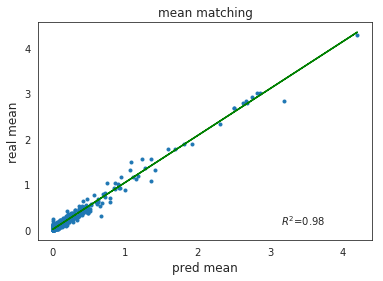

... storing 'condition' as categorical
saving figure to file ../results/violin_ISG15_scGen_kang_CD4t_multiple.pdf


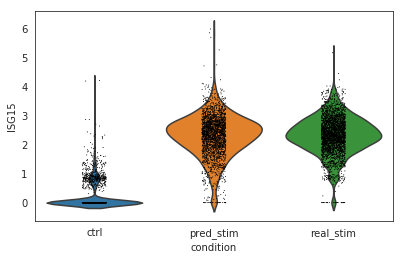

In [7]:
scg.dr.reg_mean_plot(all_Data, "../results/", "scGen_kang_CD4T_multiple")
sc.pl.violin(all_Data, groupby="condition", keys="ISG15", save="_ISG15_scGen_kang_CD4t_multiple.pdf")

Making the prediction for F-Mono cells


In [10]:
pred, delta = scg.predict('FCGR3A+Mono')
adata_list = scg.dr.extractor(train, 'FCGR3A+Mono')
all_Data = sc.AnnData(np.concatenate([adata_list[1].X.A, adata_list[2].X.A,pred]),)
all_Data.obs["condition"] = ["ctrl"] * len(adata_list[1].X.A) + ["real_stim"] * len(adata_list[2].X.A) + \
                            ["pred_stim"] * len( pred)
all_Data.var_names = adata_list[3].var_names

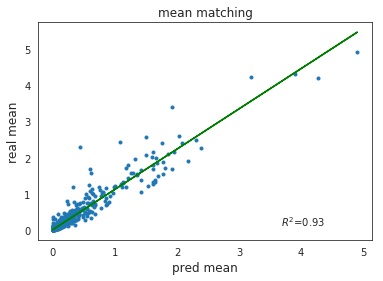

... storing 'condition' as categorical
saving figure to file ../results/violin_ISG15_scGen_kang_F-Mono_multiple.pdf


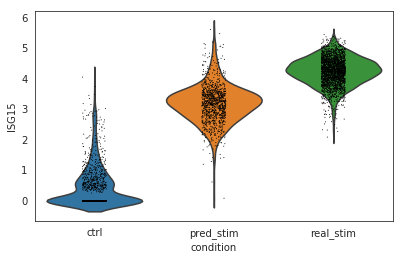

In [11]:
scg.dr.reg_mean_plot(all_Data, "../results/", "scGen_kang_F-Mono_multiple")
sc.pl.violin(all_Data, groupby="condition", keys="ISG15", save="_ISG15_scGen_kang_F-Mono_multiple.pdf")